In [41]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
twitter = pd.read_csv(r"C:\Users\Diksha\OneDrive\Desktop\twitter_training.csv")
twitter

,ID,Game,Sentiment,Message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [43]:
twitter.shape

(74681, 4)

In [44]:
twitter.info

<bound method DataFrame.info of          ID         Game Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 Message  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window

In [45]:
print('length of data is', len(twitter))

length of data is 74681


In [46]:
twitter.dtypes

ID            int64
Game         object
Sentiment    object
Message      object
dtype: object

In [47]:
np.sum(twitter.isnull().any(axis=1))

686

In [48]:
print('Count of columns in the data is:  ', len(twitter.columns))
print('Count of rows in the data is:  ', len(twitter))

Count of columns in the data is:   4
Count of rows in the data is:   74681


In [51]:
twitter.ID.unique()

array([2401, 2402, 2403, ..., 9198, 9199, 9200], dtype=int64)

In [52]:
twitter.Game.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [53]:
twitter.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [54]:
twitter.Message.unique()

array(['I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,',
       'im coming on borderlands and i will murder you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      dtype=object)

In [55]:
twitter['Message'].fillna(twitter['Message'].mode()[0], inplace=True)

In [56]:
twitter.isnull().sum()

ID           0
Game         0
Sentiment    0
Message      0
dtype: int64

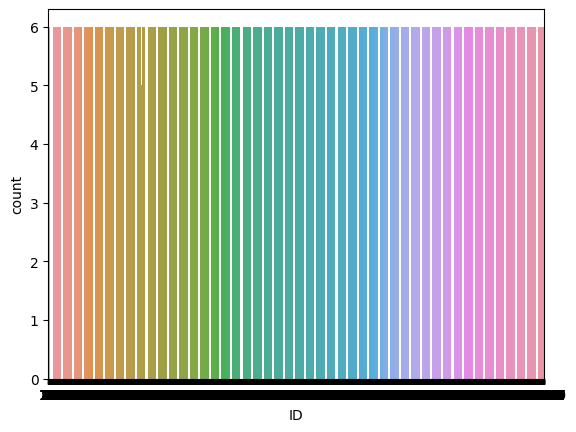